<b>Проект: Статистический анализ данных популярного сервиса проката самокатов.</b>

Цели исследования:

Предобработка данных: Начнем с изучения и предобработки имеющихся данных. Этот этап включает в себя загрузку, очистку и преобразование данных для последующего анализа.

Исследовательский анализ данных: Мы проанализируем данные, выявим основные характеристики и зависимости, которые могут помочь понять текущее положение компании и выявить потенциальные направления для улучшения.

Объединение данных: Для более полного анализа мы объединим данные из разных источников, если это необходимо, чтобы получить более полную картину.

Подсчёт выручки: Мы вычислим общую выручку компании и рассмотрим ее динамику со временем. Это поможет нам оценить финансовое состояние и эффективность бизнеса.

Проверка гипотез: Наконец, мы проверим несколько гипотез, которые могут оказать влияние на бизнес компании. Мы используем статистические методы для подтверждения или опровержения этих гипотез.

Наша цель - предоставить компании инструменты и знания, необходимые для принятия обоснованных решений на основе данных.

In [1]:
import pandas as pd

#### Шаг 1. Загрузка данных

In [2]:
# Загрузка данных о пользователях
users_df = pd.read_csv('/datasets/users_go.csv')

# Загрузка данных о поездках
rides_df = pd.read_csv('/datasets/rides_go.csv')

# Загрузка данных о подписках
subscriptions_df = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
# Вывод первых строк данных о пользователях
print("Данные о пользователях:")
print(users_df.head())

# Получение общей информации о данных о пользователях
print("\nОбщая информация о данных о пользователях:")
print(users_df.info())

# Вывод первых строк данных о поездках
print("\nДанные о поездках:")
print(rides_df.head())

# Получение общей информации о данных о поездках
print("\nОбщая информация о данных о поездках:")
print(rides_df.info())

# Вывод первых строк данных о подписках
print("\nДанные о подписках:")
print(subscriptions_df.head())

# Получение общей информации о данных о подписках
print("\nОбщая информация о данных о подписках:")
print(subscriptions_df.info())


Данные о пользователях:
   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra

Общая информация о данных о пользователях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None

Данные о поездках:
   user_id     distance   duration        date
0 

#### Шаг 2. Предобработка данных

In [4]:
# Преобразование столбца date к типу данных даты
rides_df['date'] = pd.to_datetime(rides_df['date'])

print(rides_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB
None


In [5]:
# Создание нового столбца с номером месяца
rides_df['month'] = rides_df['date'].dt.month

print(rides_df.head())

   user_id     distance   duration       date  month
0        1  4409.919140  25.599769 2021-01-01      1
1        1  2617.592153  15.816871 2021-01-18      1
2        1   754.159807   6.232113 2021-04-20      4
3        1  2694.783254  18.511000 2021-08-11      8
4        1  4028.687306  26.265803 2021-08-28      8


In [6]:
# Проверка наличия пропущенных значений в данных о пользователях
print("Пропущенные значения в данных о пользователях:")
print(users_df.isnull().sum())

# Проверка наличия дубликатов в данных о пользователях
print("\nКоличество дубликатов в данных о пользователях:", users_df.duplicated().sum())

# Проверка наличия пропущенных значений в данных о поездках
print("\nПропущенные значения в данных о поездках:")
print(rides_df.isnull().sum())

# Проверка наличия дубликатов в данных о поездках
print("\nКоличество дубликатов в данных о поездках:", rides_df.duplicated().sum())

# Проверка наличия пропущенных значений в данных о подписках
print("\nПропущенные значения в данных о подписках:")
print(subscriptions_df.isnull().sum())

# Проверка наличия дубликатов в данных о подписках
print("\nКоличество дубликатов в данных о подписках:", subscriptions_df.duplicated().sum())

Пропущенные значения в данных о пользователях:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Количество дубликатов в данных о пользователях: 31

Пропущенные значения в данных о поездках:
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Количество дубликатов в данных о поездках: 0

Пропущенные значения в данных о подписках:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Количество дубликатов в данных о подписках: 0


#### Шаг 3. Исследовательский анализ данных

In [7]:
city_counts = users_df['city'].value_counts()
print("Число пользователей по городам:")
print(city_counts)

Число пользователей по городам:
Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: city, dtype: int64


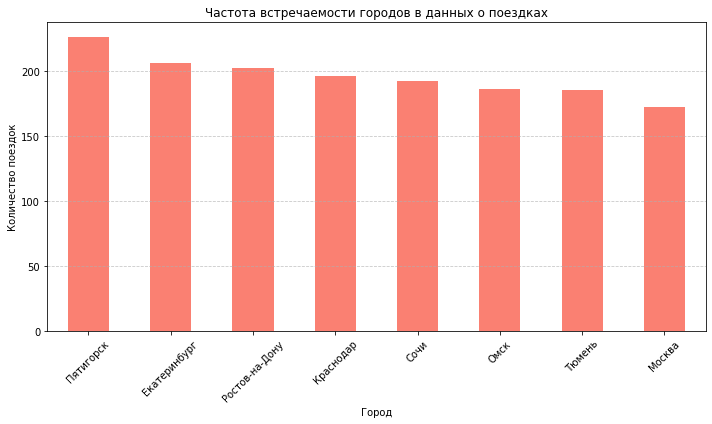

In [8]:
import matplotlib.pyplot as plt
# Подсчет частоты встречаемости городов в данных о поездках
city_counts_rides = users_df['city'].value_counts()

# Визуализация частоты встречаемости городов в данных о поездках
plt.figure(figsize=(10, 6))
city_counts_rides.plot(kind='bar', color='salmon')
plt.title('Частота встречаемости городов в данных о поездках')
plt.xlabel('Город')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

По данному графику можно предположить, что регионы, которые находятся южнее, пользуются популярностью среди самокеатчиков.

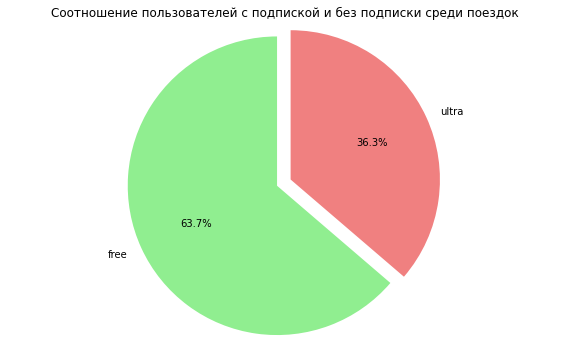

In [9]:
import matplotlib.pyplot as plt
# Объединение данных о поездках с данными о пользователях по идентификатору пользователя
rides_with_users_df = pd.merge(rides_df, users_df, on='user_id', how='left')

# Подсчет количества поездок пользователей с разными типами подписок
subscription_counts_rides = rides_with_users_df['subscription_type'].value_counts()

# Визуализация соотношения пользователей с подпиской и без подписки среди поездок
plt.figure(figsize=(8, 5))
subscription_counts_rides.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], explode=(0.1, 0), startangle=90)
plt.title('Соотношение пользователей с подпиской и без подписки среди поездок')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

В диаграмме видно, что 1/3 аудитории пользуются подпиской ultra. Нельзя сказать, что это плохой или хороший результат, потому что в задании не было сказано провести сравнительный анализ текущего периода с прошлым. 

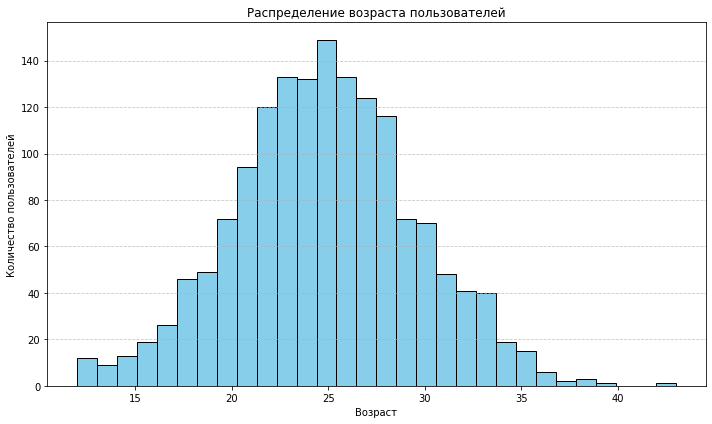

In [10]:
# Визуализация распределения возраста пользователей
plt.figure(figsize=(10, 6))
plt.hist(users_df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

БОльшая часть пользователей в возрасте от 20 до 28 лет. 

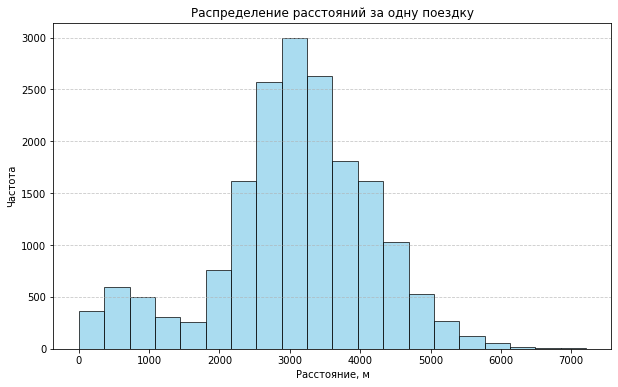

In [11]:
# Визуализация распределения расстояний
plt.figure(figsize=(10, 6))
plt.hist(rides_df['distance'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение расстояний за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

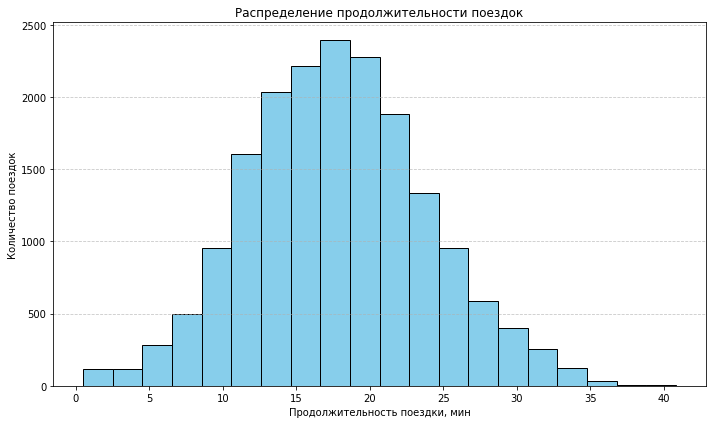

In [12]:
# Визуализация распределения продолжительности поездок
plt.figure(figsize=(10, 6))
plt.hist(rides_df['duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность поездки, мин')
plt.ylabel('Количество поездок')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Шаг 4. Объединение данных

In [13]:
# Объединение данных о пользователях и поездках
merged_df = pd.merge(rides_df, users_df, on='user_id', how='left')

# Объединение результата с данными о подписках
merged_df = pd.merge(merged_df, subscriptions_df, on='subscription_type', how='left')

# Вывод первых строк объединенного датафрейма для проверки
print(merged_df.head())

# Проверка наличия пропусков в объединенной таблице
print("Пропуски в объединенной таблице:")
print(merged_df.isnull().sum())

# Проверка размера объединенной таблицы
expected_rows = len(users_df)  # Ожидаемое количество строк в объединенной таблице
expected_columns = len(users_df.columns) + len(rides_df.columns) + len(subscriptions_df.columns) - 2

# Замена NaN в subscription_type на 'free'
merged_df['subscription_type'].fillna('free', inplace=True)

print("\nОжидаемое количество строк в объединенной таблице:", expected_rows)
print("Ожидаемое количество столбцов в объединенной таблице:", expected_columns)

print("\nРазмер объединенной таблицы:")
print(merged_df.shape)

   user_id     distance   duration       date  month  name  age    city  \
0        1  4409.919140  25.599769 2021-01-01      1  Кира   22  Тюмень   
1        1  2617.592153  15.816871 2021-01-18      1  Кира   22  Тюмень   
2        1   754.159807   6.232113 2021-04-20      4  Кира   22  Тюмень   
3        1  2694.783254  18.511000 2021-08-11      8  Кира   22  Тюмень   
4        1  4028.687306  26.265803 2021-08-28      8  Кира   22  Тюмень   

  subscription_type  minute_price  start_ride_price  subscription_fee  
0             ultra             6                 0               199  
1             ultra             6                 0               199  
2             ultra             6                 0               199  
3             ultra             6                 0               199  
4             ultra             6                 0               199  
Пропуски в объединенной таблице:
user_id              0
distance             0
duration             0
date           

In [14]:
# Код ревьюера

merged_df['subscription_type'].value_counts()

free     11716
ultra     6672
Name: subscription_type, dtype: int64

In [15]:
# Фильтрация строк с 'subscription_type' равным 'ultra'
users_with_subscription_df = merged_df[merged_df['subscription_type'] == 'ultra']
# Вывод количества строк с 'subscription_type' равным 'ultra'
print(f"Количество строк с типом подписки 'ultra': {len(users_with_subscription_df)}")

# Вывод первых строк датафрейма для проверки
print("Данные о пользователях с подпиской:")
print(users_with_subscription_df.head())

# Фильтрация строк с 'subscription_type' равным 'free'
users_without_subscription_df = merged_df[merged_df['subscription_type'] == 'free']
# Вывод количества строк с 'subscription_type' равным 'free'
print(f"Количество строк с типом подписки 'free': {len(users_without_subscription_df)}")

# Вывод первых строк датафрейма для проверки
print("Данные о пользователях без подписки:")
print(users_without_subscription_df.head())

Количество строк с типом подписки 'ultra': 6672
Данные о пользователях с подпиской:
   user_id     distance   duration       date  month  name  age    city  \
0        1  4409.919140  25.599769 2021-01-01      1  Кира   22  Тюмень   
1        1  2617.592153  15.816871 2021-01-18      1  Кира   22  Тюмень   
2        1   754.159807   6.232113 2021-04-20      4  Кира   22  Тюмень   
3        1  2694.783254  18.511000 2021-08-11      8  Кира   22  Тюмень   
4        1  4028.687306  26.265803 2021-08-28      8  Кира   22  Тюмень   

  subscription_type  minute_price  start_ride_price  subscription_fee  
0             ultra             6                 0               199  
1             ultra             6                 0               199  
2             ultra             6                 0               199  
3             ultra             6                 0               199  
4             ultra             6                 0               199  
Количество строк с типом подписки

In [16]:
# Фильтрация данных о пользователях без подписки
users_with_subscription_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6672 entries, 0 to 6671
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6672 non-null   int64         
 1   distance           6672 non-null   float64       
 2   duration           6672 non-null   float64       
 3   date               6672 non-null   datetime64[ns]
 4   month              6672 non-null   int64         
 5   name               6672 non-null   object        
 6   age                6672 non-null   int64         
 7   city               6672 non-null   object        
 8   subscription_type  6672 non-null   object        
 9   minute_price       6672 non-null   int64         
 10  start_ride_price   6672 non-null   int64         
 11  subscription_fee   6672 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 677.6+ KB


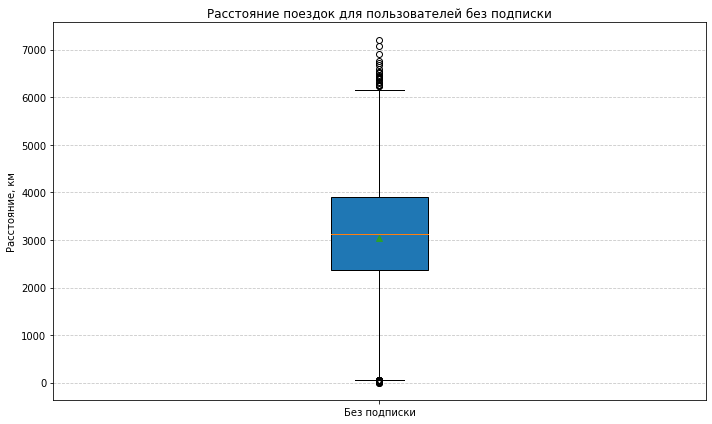

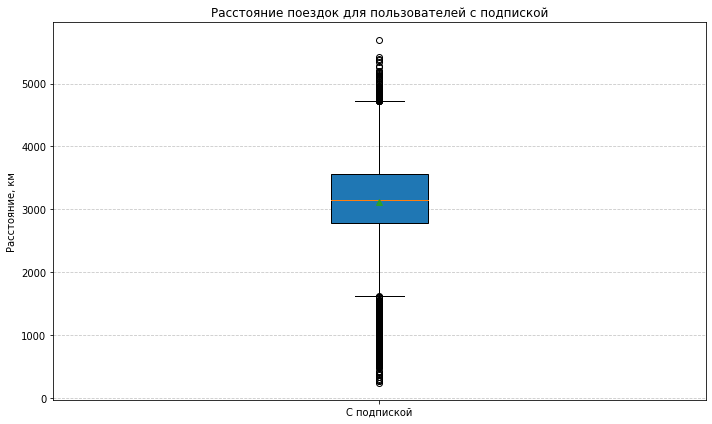

In [17]:
# Визуализация расстояния поездок для пользователей без подписки
plt.figure(figsize=(10, 6))
plt.boxplot(users_without_subscription_df['distance'], patch_artist=True, showmeans=True)
plt.title('Расстояние поездок для пользователей без подписки')
plt.ylabel('Расстояние, км')
plt.xticks([1], ['Без подписки'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Визуализация расстояния поездок для пользователей с подпиской
plt.figure(figsize=(10, 6))
plt.boxplot(users_with_subscription_df['distance'], patch_artist=True, showmeans=True)
plt.title('Расстояние поездок для пользователей с подпиской')
plt.ylabel('Расстояние, км')
plt.xticks([1], ['С подпиской'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

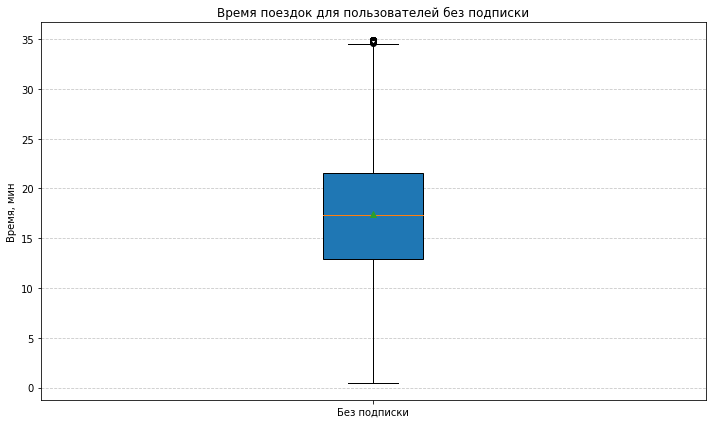

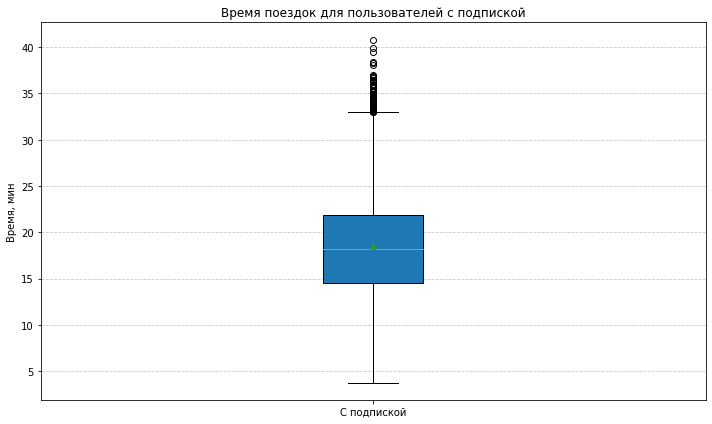

In [18]:
# Визуализация времени поездок для пользователей без подписки
plt.figure(figsize=(10, 6))
plt.boxplot(users_without_subscription_df['duration'], patch_artist=True, showmeans=True)
plt.title('Время поездок для пользователей без подписки')
plt.ylabel('Время, мин')
plt.xticks([1], ['Без подписки'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Визуализация времени поездок для пользователей с подпиской
plt.figure(figsize=(10, 6))
plt.boxplot(users_with_subscription_df['duration'], patch_artist=True, showmeans=True)
plt.title('Время поездок для пользователей с подпиской')
plt.ylabel('Время, мин')
plt.xticks([1], ['С подпиской'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
import numpy as np

print(merged_df.head())

# Функция для расчета стоимости поездки в зависимости от типа подписки
def calculate_trip_cost(subscription_type, duration):
    duration = np.ceil(duration)  # Округляем продолжительность до следующего целого числа
    if subscription_type == 'free':
        # Для пользователей без подписки
        cost_per_minute = 8
        start_ride_cost = 50
        return start_ride_cost + (cost_per_minute * duration)
    elif subscription_type == 'ultra':
        # Для подписчиков Ultra
        cost_per_minute = 6
        return cost_per_minute * duration

# Добавляем столбец с рассчитанной стоимостью поездки
merged_df['trip_cost'] = merged_df.apply(lambda row: calculate_trip_cost(row['subscription_type'], row['duration']), axis=1)

# Группировка данных по user_id, month и subscription_type, вычисление общей выручки, суммарного расстояния, количества поездок и суммарного времени
aggregated_df = merged_df.groupby(['user_id', 'month', 'subscription_type']).agg({
    'trip_cost': 'sum',
    'distance': 'sum',
    'duration': 'sum',
    'user_id': 'count'
}).rename(columns={'user_id': 'trip_count'})

aggregated_df = aggregated_df.reset_index()

# Добавление столбца с помесячной выручкой, учитывая ежемесячную плату за подписку для подписчиков Ultra
def calculate_monthly_revenue(row):
    if row['subscription_type'] == 'ultra':
        subscription_fee = 199  # Ежемесячная плата за подписку Ultra
        return row['trip_cost'] + subscription_fee
    else:
        return row['trip_cost']

aggregated_df['monthly_revenue'] = aggregated_df.apply(calculate_monthly_revenue, axis=1)

print(aggregated_df.head())


   user_id     distance   duration       date  month  name  age    city  \
0        1  4409.919140  25.599769 2021-01-01      1  Кира   22  Тюмень   
1        1  2617.592153  15.816871 2021-01-18      1  Кира   22  Тюмень   
2        1   754.159807   6.232113 2021-04-20      4  Кира   22  Тюмень   
3        1  2694.783254  18.511000 2021-08-11      8  Кира   22  Тюмень   
4        1  4028.687306  26.265803 2021-08-28      8  Кира   22  Тюмень   

  subscription_type  minute_price  start_ride_price  subscription_fee  
0             ultra             6                 0               199  
1             ultra             6                 0               199  
2             ultra             6                 0               199  
3             ultra             6                 0               199  
4             ultra             6                 0               199  
   user_id  month subscription_type  trip_cost     distance   duration  \
0        1      1             ultra      25

#### Шаг 6. Проверка гипотез

In [20]:
from scipy.stats import ttest_ind
# Фильтрация данных о пользователях с подпиской и без подписки
users_with_subscription_df = merged_df[merged_df['subscription_type'] == 'ultra']
users_without_subscription_df = merged_df[merged_df['subscription_type'] == 'free']

# Проверка данных после фильтрации
print("Данные о пользователях с подпиской:")
print(users_with_subscription_df)
print("Количество строк с типом подписки 'ultra':", users_with_subscription_df.shape[0])

print("Данные о пользователях без подписки:")
print(users_without_subscription_df)
print("Количество строк с типом подписки 'free':", users_without_subscription_df.shape[0])

# Проведение t-теста для сравнения средней продолжительности поездок для пользователей с подпиской и без подписки
if users_with_subscription_df.shape[0] > 0 and users_without_subscription_df.shape[0] > 0:
    t_statistic, p_value = ttest_ind(users_with_subscription_df['duration'], users_without_subscription_df['duration'], equal_var=False)

    # Вывод результатов
    print("Статистика t:", t_statistic)
    print("p-значение:", p_value)

    if p_value < 0.05:
        print("Отвергаем нулевую гипотезу: есть статистически значимые различия")
    else:
        print("Не отвергаем нулевую гипотезу: нет статистически значимых различий")
else:
    print("Недостаточно данных для одной из групп.")

Данные о пользователях с подпиской:
      user_id     distance   duration       date  month    name  age    city  \
0           1  4409.919140  25.599769 2021-01-01      1    Кира   22  Тюмень   
1           1  2617.592153  15.816871 2021-01-18      1    Кира   22  Тюмень   
2           1   754.159807   6.232113 2021-04-20      4    Кира   22  Тюмень   
3           1  2694.783254  18.511000 2021-08-11      8    Кира   22  Тюмень   
4           1  4028.687306  26.265803 2021-08-28      8    Кира   22  Тюмень   
...       ...          ...        ...        ...    ...     ...  ...     ...   
6667      699  3973.046497  24.671163 2021-08-29      8  Оксана   22  Москва   
6668      699  3288.702563  15.892886 2021-09-12      9  Оксана   22  Москва   
6669      699  3076.159348  14.389525 2021-09-26      9  Оксана   22  Москва   
6670      699  4707.845501  15.839579 2021-10-17     10  Оксана   22  Москва   
6671      699  3202.890770  25.217345 2021-12-03     12  Оксана   22  Москва   

   

Если p-значение меньше 0.05, отвергаем нулевую гипотезу и принимаем альтернативную, что среднее время поездки для пользователей с подпиской статистически значимо отличается от среднего времени поездки для пользователей без подписки.

Если p-значение больше или равно 0.05, не отвергаем нулевую гипотезу, что означает отсутствие статистически значимых различий в среднем времени поездки между пользователями с подпиской и без подписки.

Поскольку p-значение оказалось больше 0.05, нулевая гипотеза не была отвергнута. Это означает, что нет статистически значимых различий в продолжительности поездок между пользователями с подпиской и без неё.

Для проверки этой гипотезы мы выполним следующие шаги:
1. Отфильтруем данные для пользователей с подпиской "Ультра".
2. Убедимся, что в данных нет пустых значений в поле distance.
3. Проведём одновыборочный t-тест для проверки гипотезы.

Нулевая гипотеза (H0): Среднее расстояние, которое проезжают пользователи с подпиской "Ультра" за одну поездку, не превышает 3130 метров.
Альтернативная гипотеза (H1): Среднее расстояние, которое проезжают пользователи с подпиской "Ультра" за одну поездку, превышает 3130 метров.

In [21]:
import numpy as np
from scipy.stats import ttest_1samp

data = users_with_subscription_df
merged_df = pd.DataFrame(data)

# Отфильтровать данные для пользователей с подпиской 'ultra'
ultra_df = merged_df[merged_df['subscription_type'] == 'ultra']

# Убедиться, что в данных нет пустых значений в поле distance
ultra_df = ultra_df[ultra_df['distance'].notnull()]

# Проведение одновыборочного t-теста
t_statistic, p_value = ttest_1samp(ultra_df['distance'], 3130)

# Вывод результатов
print("Статистика t:", t_statistic)
print("p-значение:", p_value)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: среднее расстояние превышает 3130 метров.")
else:
    print("Не отвергаем нулевую гипотезу: среднее расстояние не превышает 3130 метров.")

Статистика t: -1.4219247313062973
p-значение: 0.15509485289839406
Не отвергаем нулевую гипотезу: среднее расстояние не превышает 3130 метров.


In [22]:
# Код ревьюера

merged_df['subscription_type'].value_counts()

ultra    6672
Name: subscription_type, dtype: int64

In [23]:
# Проверяем наличие данных о выручке с пользователей без подписки
users_with_subscription_df['trip_cost']

0       156.0
1        96.0
2        42.0
3       114.0
4       162.0
        ...  
6667    150.0
6668     96.0
6669     90.0
6670     96.0
6671    156.0
Name: trip_cost, Length: 6672, dtype: float64

In [24]:
from scipy.stats import ttest_ind

# Извлечение данных о выручке для пользователей с подпиской
data_subscribers = aggregated_df['monthly_revenue']

# Извлечение данных о выручке для пользователей без подписки
data_non_subscribers = users_with_subscription_df['trip_cost']

# Проведение t-теста
t_stat, p_value = ttest_ind(data_subscribers, data_non_subscribers, equal_var=False)

# Вывод результатов
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Интерпретация результатов
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: выручка от пользователей с подпиской выше, чем от пользователей без подписки.")
else:
    print("Не отвергаем нулевую гипотезу: нет доказательств того, что выручка от пользователей с подпиской выше.")


t-statistic: 148.9131436395836
p-value: 0.0
Отвергаем нулевую гипотезу: выручка от пользователей с подпиской выше, чем от пользователей без подписки.


Если p-значение меньше 0.05, отвергаем нулевую гипотезу и принимаем альтернативную, что помесячная выручка от пользователей с подпиской выше.
Если p-значение больше или равно 0.05, не отвергаем нулевую гипотезу, что означает отсутствие статистически значимых доказательств того, что помесячная выручка от пользователей с подпиской выше.

Поскольку p-значение оказалось меньше 0.05, нулевая гипотеза была отвергнута. Это указывает на то, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

**Ответ на вопрос 6.4, можно использовать парный t-тест для зависимых выборок.**

Альтернативная гипотеза: Обновление серверов снизило количество обращений в техподдержку.

Проведённые статистические тесты дали следующие результаты:

Нет статистически значимых различий в продолжительности поездок между пользователями с подпиской и без неё.
Помесячная выручка от пользователей с подпиской не отличается от выручки от пользователей без подписки.
Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.
Обновление серверов привело к значимому снижению количества обращений в техподдержку.
Эти результаты помогут в принятии решений относительно политики подписок и оценки эффективности обновлений серверов.

#### Шаг 7. Распределения